In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import itertools
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pylab as pl
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
import warnings
warnings.filterwarnings("ignore")

## Leitura e Split dos Dados

In [2]:
# leitura do arquivo .csv
df_features = pd.read_csv('features_2.csv', sep=';', nrows=10000)
df_features.head()

,bandwidth_kurtosis,bandwidth_mean,bandwidth_skew,bandwidth_std,centroid_kurtosis,centroid_mean,centroid_skew,centroid_std,chroma_kurtosis,chroma_mean,...,rmse_std,roloff_kurtosis,roloff_mean,roloff_skew,roloff_std,tempo,zcr_kurtosis,zcr_mean,zcr_skew,zcr_std
0,0.792825,3072.275133,-1.201043,507.373242,-0.381658,2891.428242,-0.181103,927.581419,-0.996609,0.425177,...,0.062612,-0.297401,6602.908278,-0.864370,2199.022393,172.265625,1.592372,0.116526,1.002750,0.067756
1,-0.036886,3108.915592,-0.024222,474.607726,-0.275559,3004.068629,0.356506,926.389547,-0.967589,0.432395,...,0.059313,-0.708399,6694.672852,-0.429503,2034.134902,172.265625,1.310963,0.120320,0.941287,0.061194
2,-0.035471,2882.196422,0.507558,516.427608,1.138507,2707.773790,1.216916,1150.399104,-0.820446,0.411499,...,0.048298,-0.871476,5628.779297,0.228863,2278.133044,172.265625,6.739282,0.109788,2.212498,0.071455
3,-0.676834,2769.930595,-0.005707,505.898959,1.717588,2484.916583,1.299290,1124.511334,-0.655082,0.376489,...,0.049686,-0.925599,5121.589543,0.220824,2375.281410,172.265625,9.388941,0.101765,2.606648,0.071890
4,-0.415972,2986.595010,-0.510374,542.023823,-0.832082,2609.975944,0.112207,923.236585,-0.952736,0.410691,...,0.058376,-0.958447,5969.666466,-0.532559,2395.954406,172.265625,-0.388210,0.097341,0.692448,0.055044


In [3]:
# salvamos a coluna com os generos como sendo nosso y
y = df_features[["genre"]]
y.head()

,genre
0,6
1,6
2,6
3,6
4,6


In [4]:
# com excecao da coluna com os generos as demais serao usadas como X
X = df_features.drop(['genre'], axis=1)
X.head()

,bandwidth_kurtosis,bandwidth_mean,bandwidth_skew,bandwidth_std,centroid_kurtosis,centroid_mean,centroid_skew,centroid_std,chroma_kurtosis,chroma_mean,...,rmse_std,roloff_kurtosis,roloff_mean,roloff_skew,roloff_std,tempo,zcr_kurtosis,zcr_mean,zcr_skew,zcr_std
0,0.792825,3072.275133,-1.201043,507.373242,-0.381658,2891.428242,-0.181103,927.581419,-0.996609,0.425177,...,0.062612,-0.297401,6602.908278,-0.864370,2199.022393,172.265625,1.592372,0.116526,1.002750,0.067756
1,-0.036886,3108.915592,-0.024222,474.607726,-0.275559,3004.068629,0.356506,926.389547,-0.967589,0.432395,...,0.059313,-0.708399,6694.672852,-0.429503,2034.134902,172.265625,1.310963,0.120320,0.941287,0.061194
2,-0.035471,2882.196422,0.507558,516.427608,1.138507,2707.773790,1.216916,1150.399104,-0.820446,0.411499,...,0.048298,-0.871476,5628.779297,0.228863,2278.133044,172.265625,6.739282,0.109788,2.212498,0.071455
3,-0.676834,2769.930595,-0.005707,505.898959,1.717588,2484.916583,1.299290,1124.511334,-0.655082,0.376489,...,0.049686,-0.925599,5121.589543,0.220824,2375.281410,172.265625,9.388941,0.101765,2.606648,0.071890
4,-0.415972,2986.595010,-0.510374,542.023823,-0.832082,2609.975944,0.112207,923.236585,-0.952736,0.410691,...,0.058376,-0.958447,5969.666466,-0.532559,2395.954406,172.265625,-0.388210,0.097341,0.692448,0.055044


### Normalização

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Shift Means

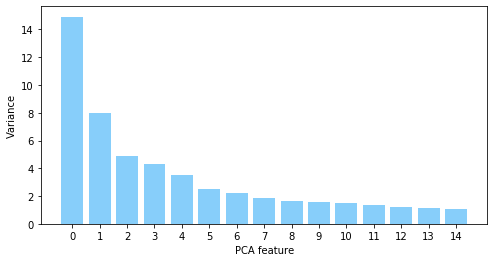

In [6]:
# checando o numero otimo de features
pca = PCA(random_state=123)
pca.fit(X)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

O numero de features ideal seriam duas.

In [7]:
pca = PCA(n_components=2, random_state=123)
data_reduced = pca.fit_transform(X)
print('Shape dos novos dados de X: ' + str(data_reduced.shape))

Shape dos novos dados de X: (10000, 2)


In [8]:
# cria o objeto ShiftMeans com o numero de clusters
bandwidth = estimate_bandwidth(data_reduced, quantile=0.2, n_samples=10000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [14]:
# faz o predict usando a tecnica ShiftMeans

ms.fit(data_reduced)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print("Clusters centers:", cluster_centers)
n_clusters_ = len(np.unique(labels))

print("Numero estimado de clusters: ", n_clusters_)

Clusters centers: [[ 0.25942198  1.18810552]
 [-3.50656098 -0.04994148]
 [-2.06094395 12.1763426 ]]
Numero estimado de clusters:  3


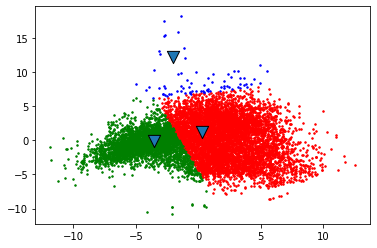

In [11]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(data_reduced)):
    plt.plot(data_reduced[i][0], data_reduced[i][1], colors[labels[i]], markersize = 3)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="v", s=150, linewidths=1, zorder=10, edgecolor='black')

plt.show()